# Quantum Coin Game

### Table of Contents

1. [Introduction](#introduction)<br>
   1.1 [What is Quantum Coin Game](#quantum_definition)<br>
   1.2 [Concept](#concept)<br>
   1.3 [Idea](#idea)<br>
   1.4 [Rules of the Game](#rules)<br>
2. [Play It](#play_it)<br>
3. [Analogy](#analogy)<br>
4. [Approach](#approach)<br>
5. [Optimal Strategy](#optimal)<br>
   5.1 [Play it with Qiskit](#quantum_play)<br>
   5.2 [Measurement](#quantum_measurement)<br>
   5.3 [QASM Simulator](#quantum_qasm)<br>
   5.4 [Who Wins?](#quantum_wins)<br>
   5.5 [Running on Quantum Computer](#real_qc)<br> 
6. [Conclusion](#conclusion)<br>
7. [References](#references)<br>
8. [Quick Exercise](#quick_exercise)<br>
9. [Version Information](#version_information)

### Introduction <a id="introduction"></a>


### What is Quantum Coin Game ? <a id="quantum_definition"></a>
 Quantum Coin Game is one of the fundamental concept of quantum computing, which uses simple implementation of quantum gates or more precisely uses the wierdness of quantum mechanics, to win about 97% of the time, when played against an opponent. Flipping of coin and say heads or tails.

### Where the concept came from ? <a id="concept"></a>
 The concept of Quantum Coin Game came from the idea of classical coin game which can only show heads and tails. But since the game utilizes the concepts of quantum mechanics, it would be interesting to see what could be the outcome of the whole experiment.

### What is the main idea of this game ? <a id="idea"></a>
 The main concept of this game is how the quantum computer uses the power of quantum superposition, which tells an object can exists in 2 different states at the same time, to win absolutely everytime.

 **NOTE**: To learn more about quantum superposition, link to "[Qiskit Textbook](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)" superposition page.

### What are the rules of this game ? <a id="rules"></a>
 1. Quantum Computer plays a move but it is not revealed to the Opponent(Human).
 2. Opponent(Human) plays a move and it is also not revealed to the Quantum Computer.
 3. Finally Quantum Computer plays a move.
 4. Results are shown. If its heads, then Quantum Computer wins. Else, Opponent(Human) wins.
 
**NOTE**: "Playing a move" refers to "Flipping the coin" and we consider the coin as fair coin.

**NOTE**: Refer to [Shohini's Ted Talk](#conclusion)

#### **Play it** <a id="play_it"></a>

In [17]:
# Importing all the necessary library
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter
import ipywidgets as widgets

# Layout
button_p = widgets.Button(
    description='Play')
gate_p = widgets.Dropdown(
    options=[('Identity', 'i'), ('Bit Flip', 'x')],
    description='Choice: ',
    disabled=False,
)
out_p = widgets.Output()
def on_button_clicked(b):
    with out_p:
        
        # Initial Circuit
        circuit_p = QuantumRegister(1, 'circuit')
        measure_p = ClassicalRegister(1, 'result')
        qc_p = QuantumCircuit(circuit_p, measure_p)
        
        # Turn 1
        qc_p.h(circuit_p[0])
        
        # Turn 2
        if gate_p.value == 'i':
            qc_p.i(circuit_p[0])
        if gate_p.value == 'x':
            qc_p.x(circuit_p[0])
        
        # Turn 3
        qc_p.h(circuit_p[0])
        
        # Measure  
        qc_p.measure(circuit_p, measure_p)
        
        # QASM
        backend_p = Aer.get_backend('aer_simulator')
        job_p = execute(qc_p, backend_p, shots=8192)
        res_p = job_p.result().get_counts()
        
        # Result
        if len(res_p) == 1 and list(res_p.keys())[0] == '0':
            print("You Lose to Quantum. Quantum Computer Wins")
        if len(res_p) == 1 and list(res_p.keys())[0] == '1':
            print("You Win against Quantum Computer")
        if len(res_p) == 2:
            print("Either Quantum or You Wins")

button_p.on_click(on_button_clicked)
widgets.VBox([gate_p, button_p, out_p])

### Analogy <a id="analogy"></a>

Now that we know what is a quantum coin game, what is it based on and most importantly what are the rules of this game, lets convert the concept of this game in quantum computing terminology.

* The 'coin' in flipping a coin we referring here is a 'single qubit gate'.

$$
      |\psi\rangle=\begin{bmatrix}\alpha \\ \beta\end{bmatrix}
$$

  where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$


* "Flipping" the coin is application of the bit-flip operator

$$
  X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

* The "heads" state is defined as 
$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$ and "tails" as 
$$
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

* The quantum computer "plays" by applying the Hadamard $H$ operator 
$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 1 \\ 1 & -1 \end{bmatrix}
$$


### Approach <a id="approach"></a>

Lets see how to approach the game in quantum computing terminology-

* The coin is initialized to the $|0\rangle$ "heads" state.

* The computer plays, applying the Hadamard $H$ operator to the coin (operators are applied using matrix multiplication). 
$$
H|0\rangle = \frac{1}{\sqrt2}(|0\rangle + |1\rangle)
$$
The coin enters the 
$$
H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 \\ 1 \end{bmatrix}
$$
state.


* The human plays, choosing whether to flip the coin (apply the $X$ operator) or do nothing (apply the $I$ operator). However, since the $X$ operator just flips the state vector upside down, $X$ has no effect. Same goes for $I$.
$$
X|+\rangle=|+\rangle 
$$
$$
I|+\rangle=|+\rangle 
$$
No matter what, the state is $|+\rangle$ after the human plays.

* The computer plays, applying the Hadamard $H$ operator again, taking the coin to the $|0⟩$ "heads" state.
$$
H|+\rangle = |0\rangle
$$

In [18]:
# Importing all the necessary library

from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter
import ipywidgets as widgets

In [19]:
# Building the initial circuit

def initial_circuit():
    circuit = QuantumRegister(1, 'circuit')
    measure = ClassicalRegister(1, 'result')
    qc = QuantumCircuit(circuit, measure)
    qc.draw('mpl')
    return qc, circuit, measure

In [20]:
# Widget Initialization

gate = widgets.Dropdown(
    options=[('Identity', 'i'), ('Bit Flip', 'x')],
    description='Choice: ',
    disabled=False,
)

### **Optimal Strategy** <a id="optimal"></a>

Using the above approach the possibility table reduces to-

<table>
<tr>
    <th>Start State</th>
    <th>Quantum</th>
    <th>Classical</th>
    <th>Quantum</th>
    <th>Result</th>
    <th>Who Wins?</th>
</tr>
<tr>
    <td>$|0\rangle$</td>
    <td>$H$</td>
    <td>$I$</td>
    <td>$H$</td>
    <td>$|0\rangle$</td>
    <td>Quantum</td>
</tr>
<tr>
    <td>$|0\rangle$</td>
    <td>$H$</td>
    <td>$X$</td>
    <td>$H$</td>
    <td>$|0\rangle$</td>
    <td>Quantum</td>
</tr>
</table>

Now lets look at the possibilities-


1. Quantum Computer Wins ( $|0\rangle$ ):

$$
\frac{2}{2} = 100 \%
$$

2. Classical Human Wins ( $|1\rangle$ ):

$$
  \frac{0}{2} = 0 \%
$$

3. Either Quantum Computer or Classical Human Wins ( $|0\rangle + |1\rangle$ ):

$$
  \frac{0}{2} = 0 \%
$$

This table shows the quantum computer wins $100\%$ of the time. But in Shohini's talk it is $~97\%$, due to errors.

### **Lets play this version using Qiskit** <a id="quantum_play"></a>

#### Building the initial circuit

In [21]:
qc, circuit, measure = initial_circuit()

#### **Turn 1. Quantum Computer**

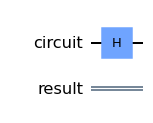

In [22]:
# Use H Gate

qc.h(circuit[0])
qc.draw('mpl')

#### **Turn 2. Classical Human**

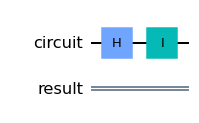

In [23]:
if gate.value == 'i':
    qc.i(circuit[0])
if gate.value == 'x':
    qc.x(circuit[0])

qc.draw('mpl')

#### **Turn 3. Quantum Computer**

Quantum Computer uses Hadamard $H$ on its first turn

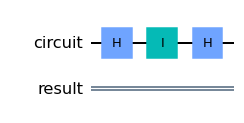

In [24]:
# Used H Gate

qc.h(circuit[0])
qc.draw('mpl')

#### **Measurement** <a id="quantum_measurement"></a>

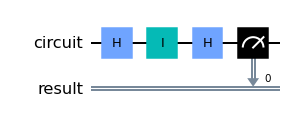

In [25]:
qc.measure(circuit, measure)
qc.draw('mpl')

#### **QASM_Simulator** <a id="quantum_qasm"></a>

{'0': 8192}


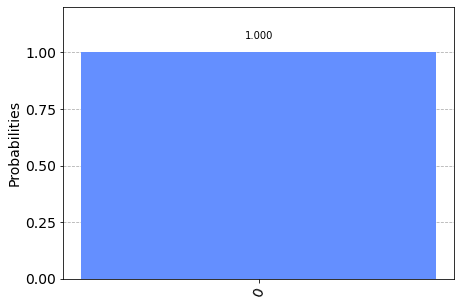

In [26]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=8192)
res = job.result().get_counts()
print(res)
plot_histogram(res)

#### **Lets see who wins** <a id="quantum_wins"></a>

In [27]:
if len(res) == 1 and list(res.keys())[0] == '0':
    print("Quantum Computer Wins")
if len(res) == 1 and list(res.keys())[0] == '1':
    print("Classical Human Wins")
if len(res) == 2:
    print("Either Quantum Computer or Classical Human Wins")

Quantum Computer Wins


#### **Running on Quantum Computer** <a id="real_qc"></a>

{'0': 8134, '1': 58}


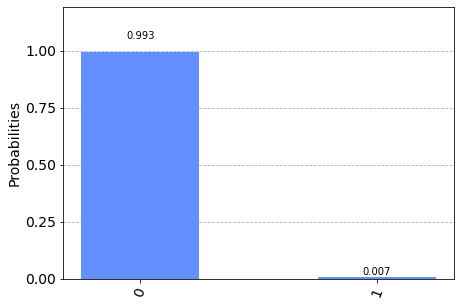

In [29]:
provider = IBMQ.load_account()
backend_real = provider.get_backend('ibmq_manila')
job_real = execute(qc, backend_real, shots=8192)
res_real = job_real.result().get_counts()
print(res_real)
plot_histogram(res_real)

Unlike the perfect simulation, the real quantum computer only wins ~$99\ \%$ of the time, the $1\ \%$ in which it loses is due to errors. Quantum computers have improved a bit since [Shohini's talk](#conclusion) where the error is closer to $3\ \%$.

### Conclusion <a id="conclusion"></a>

This simple and yet fun little game shows the basic quantum states $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|−\rangle$, plus the common ways of moving between them with the $X$, $H$, $I$, $Z$ gates. 

### References <a id="references"></a>

This notebook is inspired from:

 * [1]. [Ted talk by Sohini Ghosh](https://www.ted.com/talks/shohini_ghose_a_beginner_s_guide_to_quantum_computing#t-208006). 

 * [2]. Quantum Coin Flipping from [Wikipedia](https://en.wikipedia.org/wiki/Quantum_coin_flipping)

#### **Quick Exercise** <a id="quick_exercise"></a>

The rules of the game we learned so far are the main rules of the game.
But, think of other variations of the game as well, tweak the game a little could result in significant change in answer. Such as-

1. What if, instead of quantum computer taking first turn, the classical human take the first turn ?
2. What if, instead of representing head as $|0\rangle$, the tail is represented as $|0\rangle$ ?
3. What if, instead of using fair coin, we used unfair coin ?
4. What if, instead of playing against a classical human, the quantum computer plays with another quantum computer ?
5. What if, instead of having 3 turns, there are $n$ number of turns ?
6. What if, instead of using all gates, restrict the use of some gates ?

and many more variations are possible.

### Version Information <a id="version_information"></a>

In [ ]:
%qiskit_version_table